In [19]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from tqdm import tqdm_notebook
import re

In [3]:

df_train = pd.read_csv('train_1.csv')


In [4]:
df_train.shape

(145063, 551)

In [6]:
df_train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
2015-07-01,124323.0,1195.856567,72753.518671,0.0,13.0,109.0,524.00,20381245.0
2015-07-02,124247.0,1204.003638,74215.145424,0.0,13.0,108.0,519.00,20752194.0
2015-07-03,124519.0,1133.675969,69610.224744,0.0,12.0,105.0,504.00,19573967.0
2015-07-04,124409.0,1170.437324,72573.513699,0.0,13.0,105.0,487.00,20439645.0
2015-07-05,124404.0,1217.769300,73796.116656,0.0,14.0,113.0,540.00,20772109.0
2015-07-06,124580.0,1290.273190,80544.484681,0.0,11.0,113.0,555.00,22544669.0
2015-07-07,124399.0,1239.136754,75762.876927,0.0,13.0,115.0,551.00,21210887.0
2015-07-08,124769.0,1193.092122,68200.017009,0.0,13.0,117.0,554.00,19107911.0
2015-07-09,124819.0,1197.991772,71497.170772,0.0,14.0,115.0,549.00,19993848.0
2015-07-10,124721.0,1189.651197,72145.361308,0.0,14.0,113.0,545.00,20201821.0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [10]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in tqdm_notebook(df.columns):
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [13]:
df_train = reduce_mem_usage(df_train)

Memory usage of dataframe is 609.82 MB



Memory usage after optimization is: 305.46 MB
Decreased by 49.9%


In [14]:
profile = pandas_profiling.ProfileReport(df_train.sample(50000))

# Language in Pages
One thing that might be interesting to look it is how the different languages used in Wikipedia might affect the dataset. I'll use a simple regular expression to search for the language code in the wikipedia URL. There are also a number of non-wikipedia URLs that will fail the regex search. These are wikimedia pages, so I'll give them the code 'na' since I haven't determined their language. Many of these will be things like images that do not really have a language.

In [21]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

df_train['lang'] = df_train.Page.map(get_language)

from collections import Counter

print(Counter(df_train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


There are 7 languages plus the media pages. The languages used here are: English, Japanese, German, French, Chinese, Russian, and Spanish. This will make any analysis of the URLs difficult since there are four different writing systems to be dealt with (Latin, Cyrillic, Chinese, and Japanese). Here, I will create dataframes for the different types of entries. I will then calculate the sum of all views

In [22]:
lang_sets = {}
lang_sets['en'] = df_train[df_train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = df_train[df_train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = df_train[df_train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = df_train[df_train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = df_train[df_train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = df_train[df_train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = df_train[df_train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = df_train[df_train.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

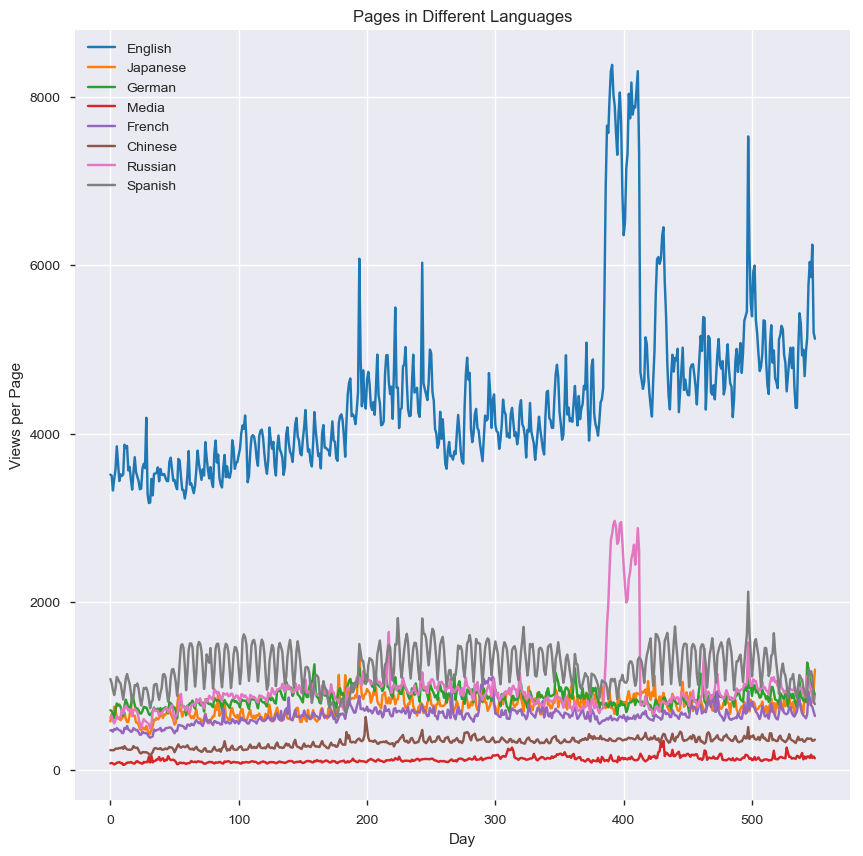

In [23]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

English shows a much higher number of views per page, as might be expected since Wikipedia is a US-based site. There is a lot more structure here than I would have expected. The English and Russian plots show very large spikes around day 400 (around August 2016), with several more spikes in the English data later in 2016. My guess is that this is the effect of both the Summer Olympics in August and the election in the US.

There's also a strange feature in the English data around day 200.

The Spanish data is very interesting too. There is a clear periodic structure there, with a ~1 week fast period and what looks like a significant dip around every 6 months or so.

# Periodic Structure and FFTs
Since it looks like there is some periodic structure here, I will plot each of these separately so that the scale is more visible. Along with the individual plots, I will also look at the magnitude of the Fast Fourier Transform (FFT). Peaks in the FFT show us the strongest frequencies in the periodic signal.

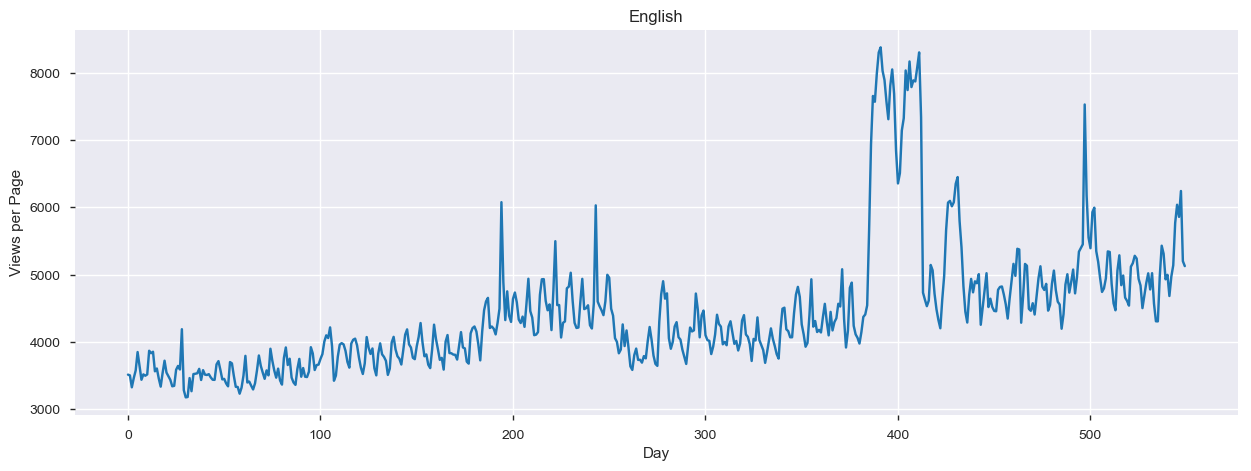

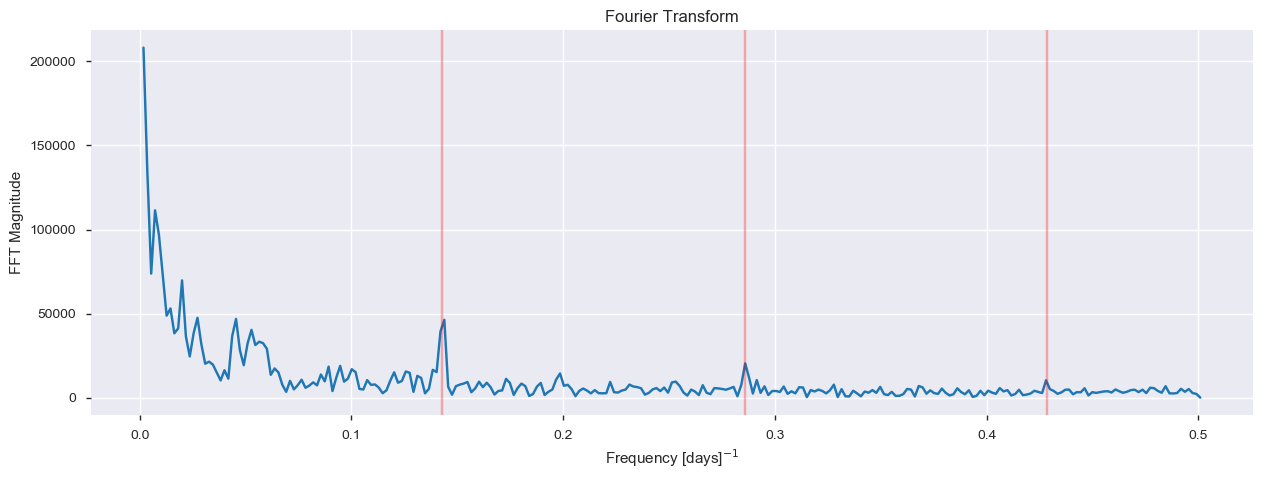

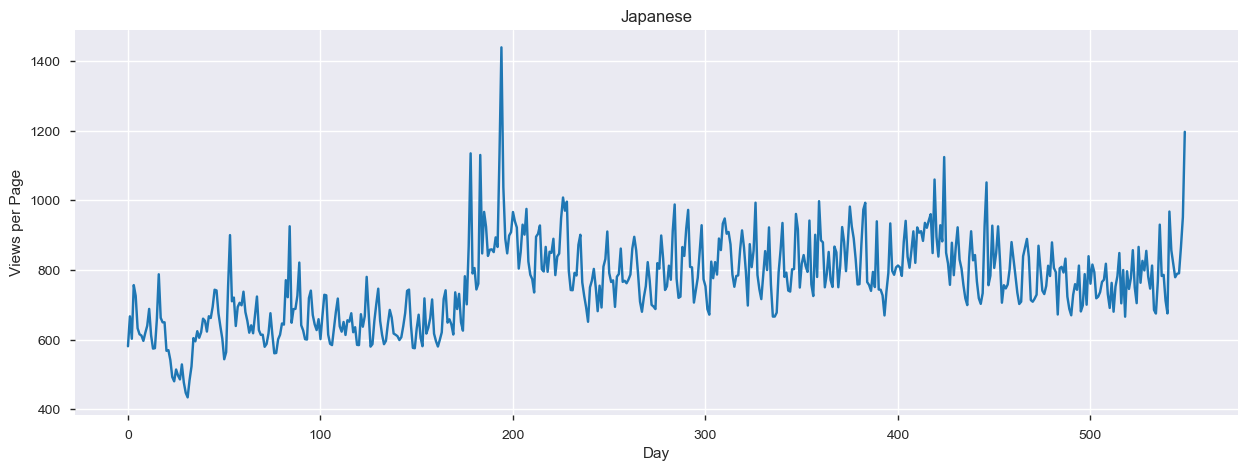

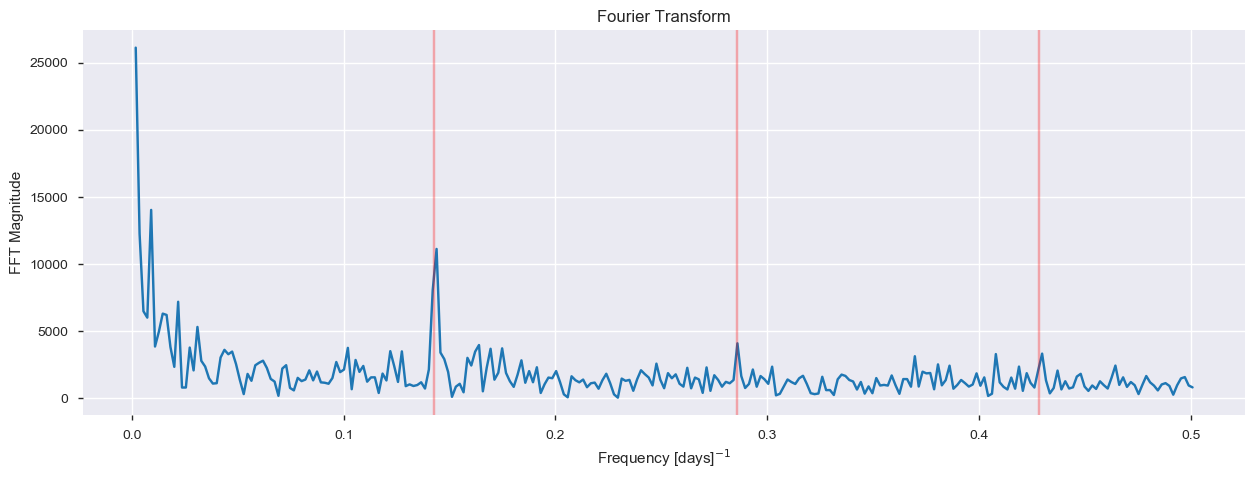

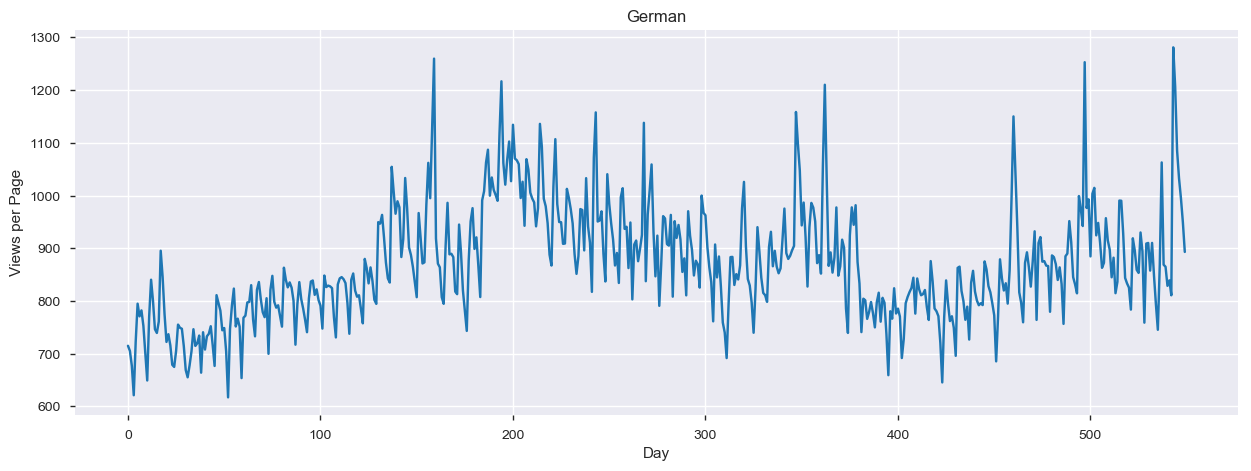

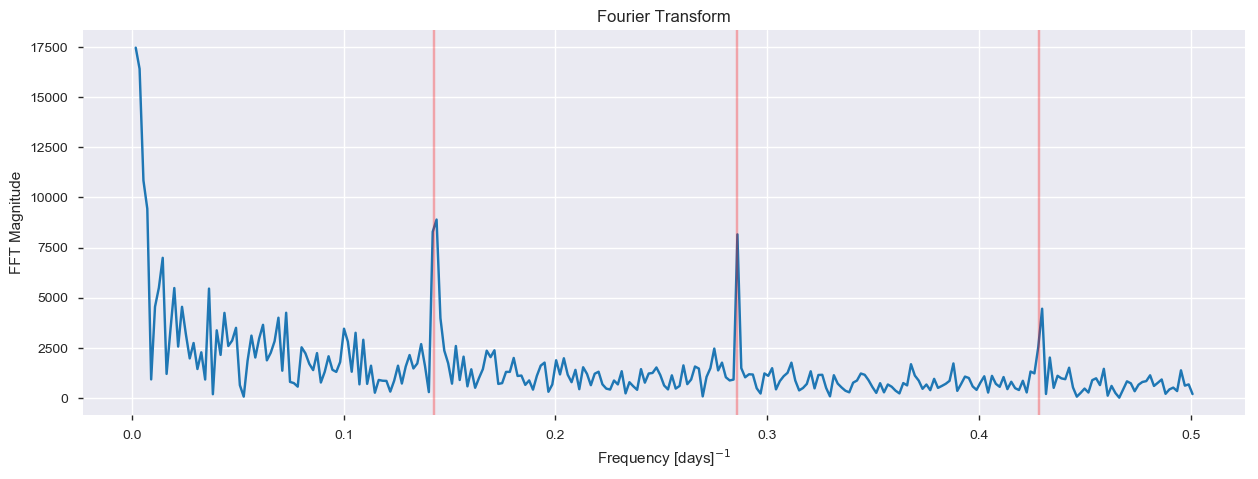

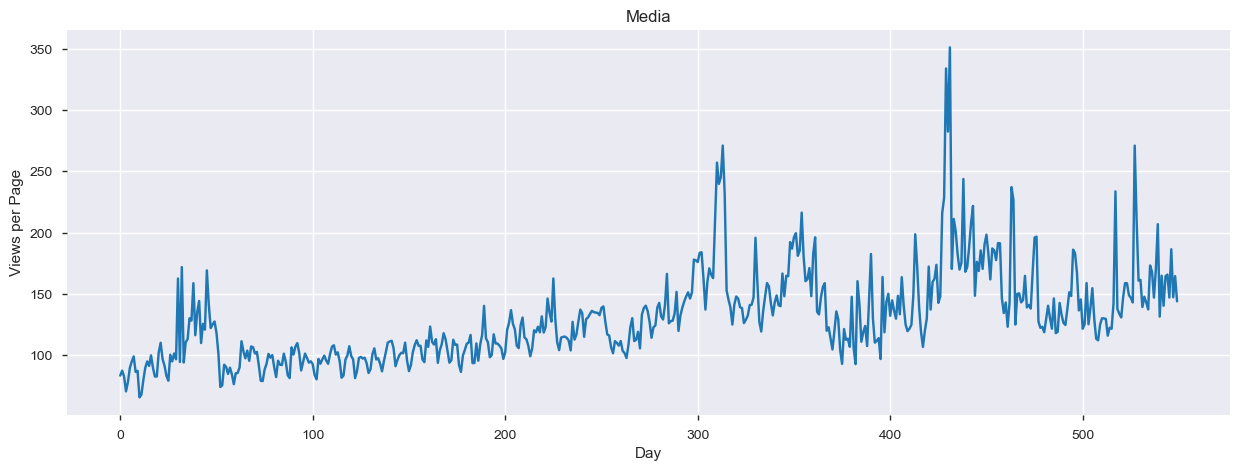

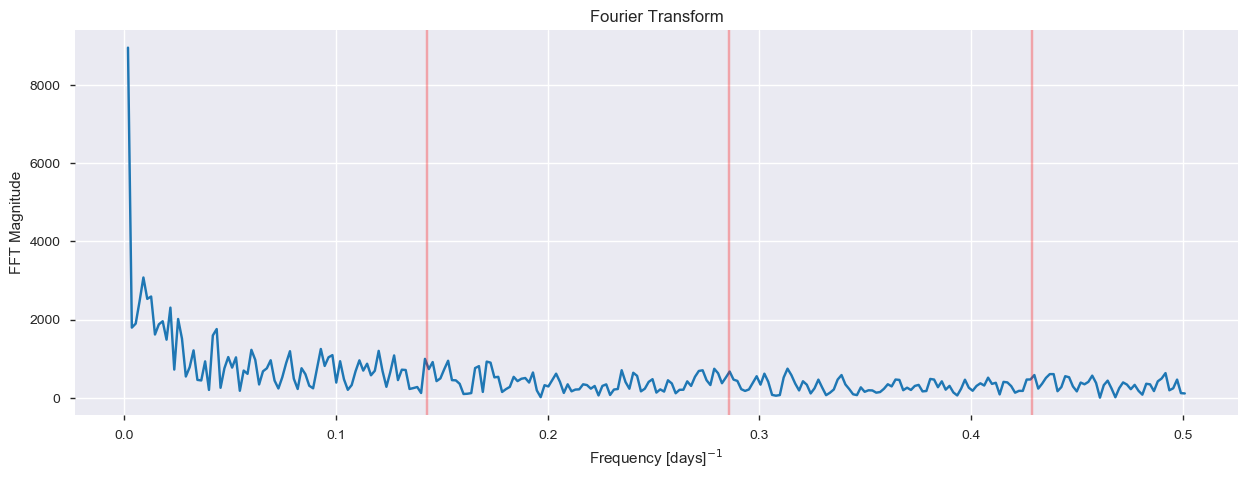

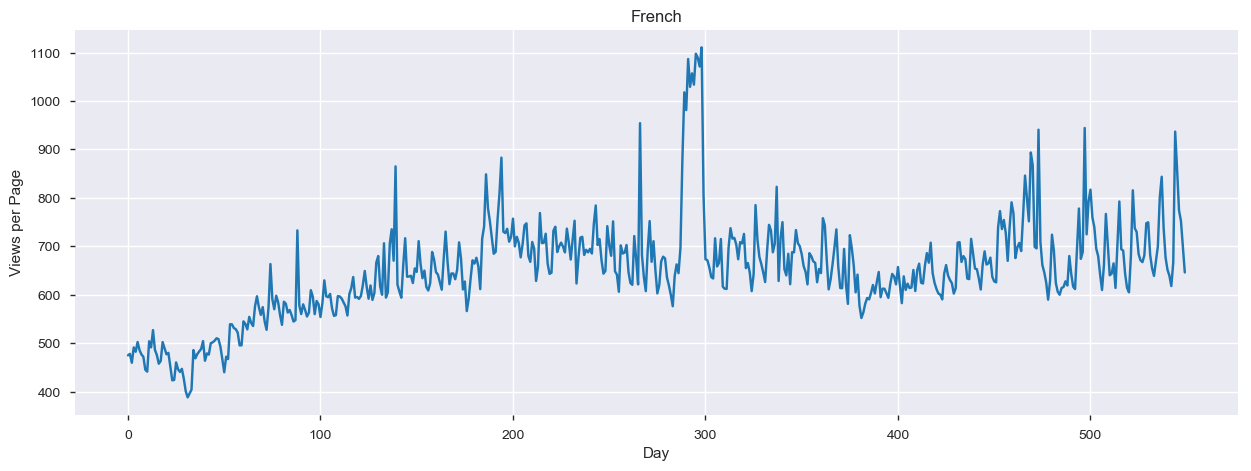

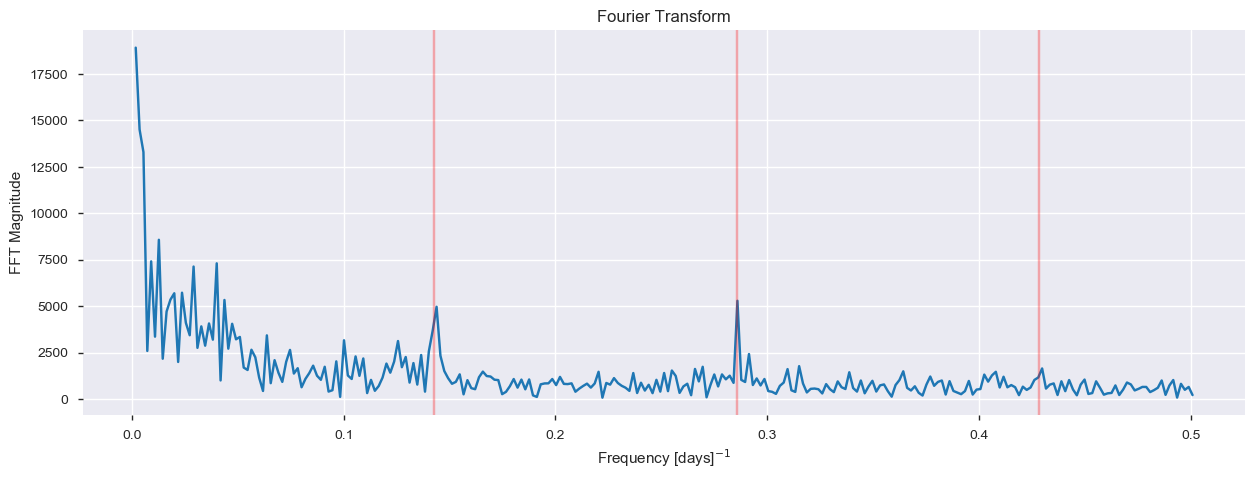

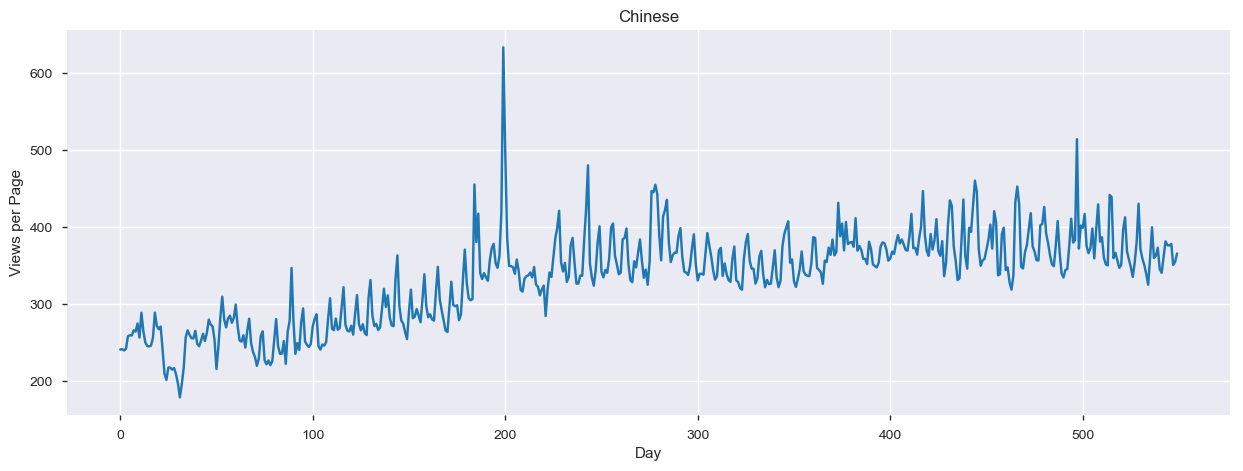

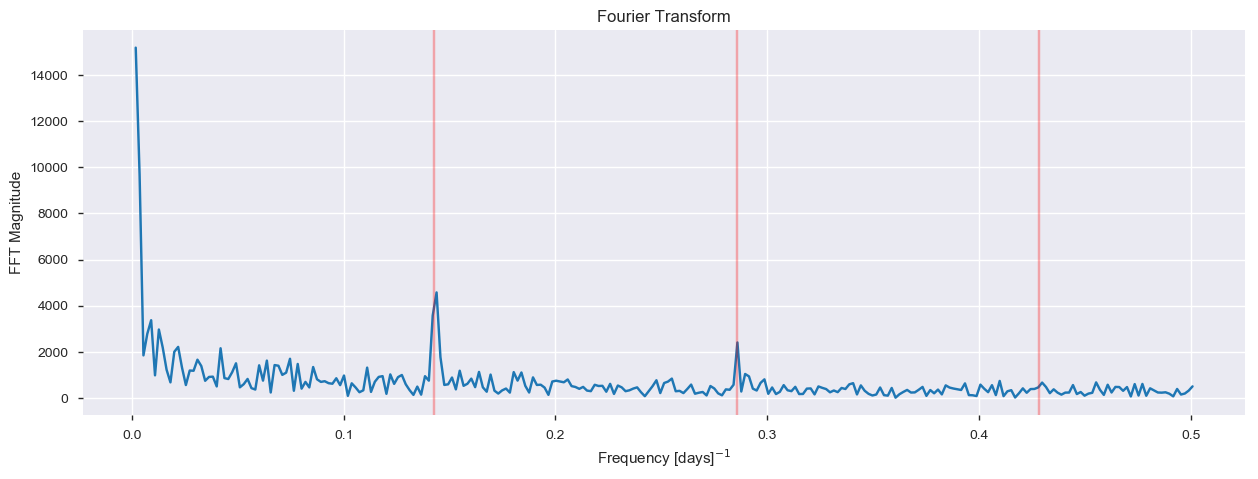

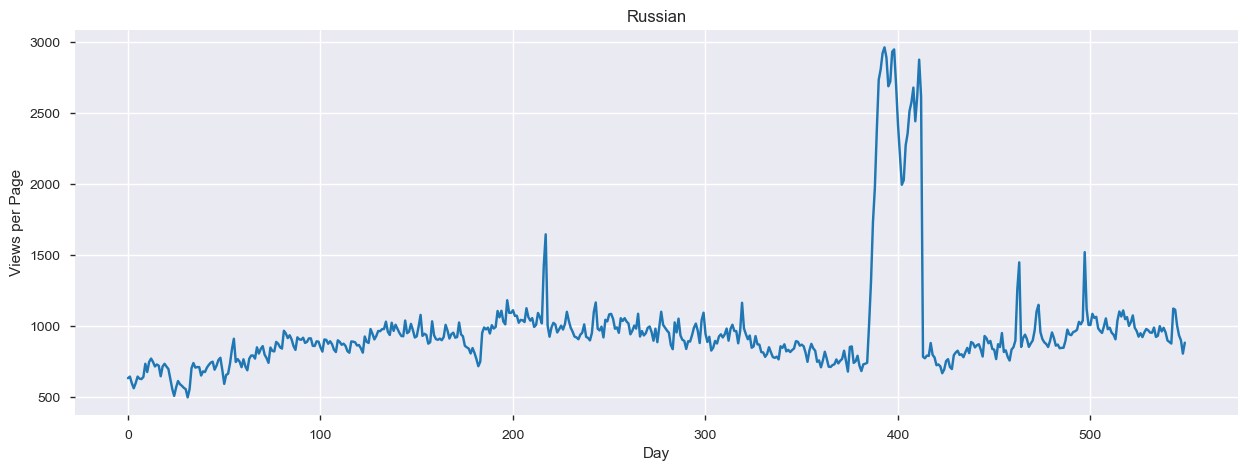

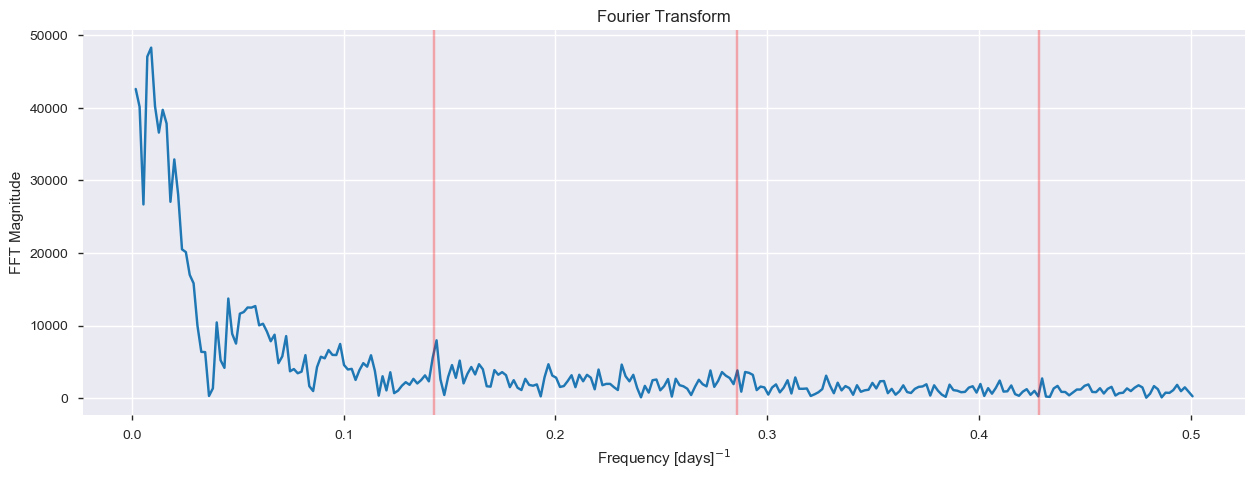

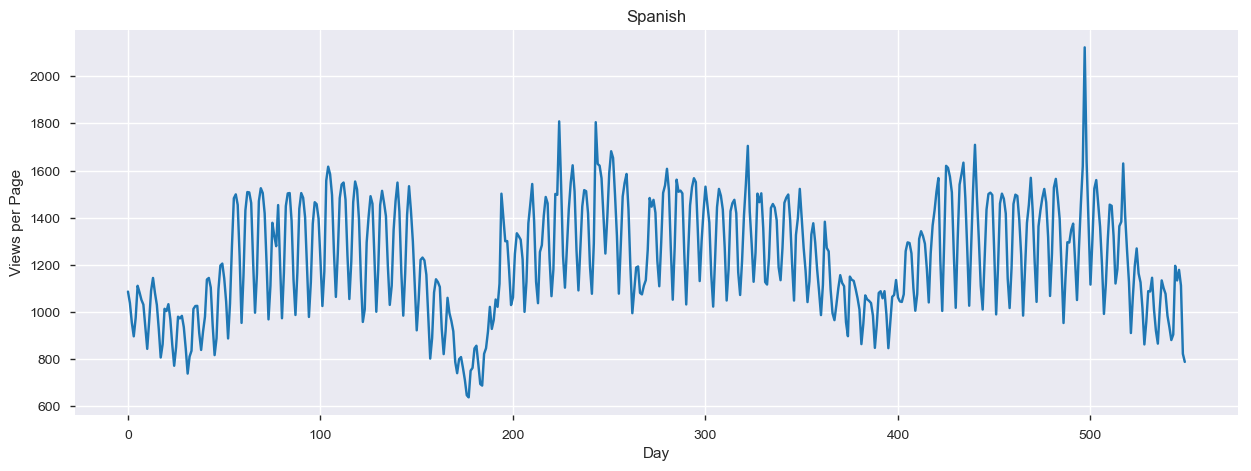

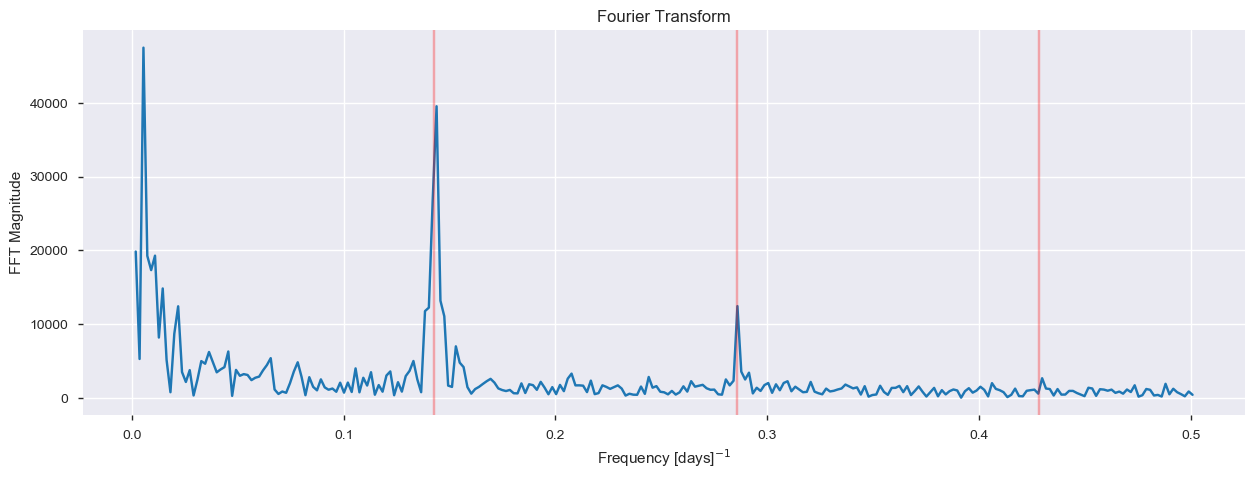

In [25]:
from scipy.fftpack import fft
def plot_with_fft(key):

    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    plt.title(labels[key])
    plt.plot(days,sums[key],label = labels[key] )
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(sums[key])
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
    fft_xvals = [day / days[-1] for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:],fft_mag[1:],label = labels[key] )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()

for key in sums:
    plot_with_fft(key)


# Some individual Entries

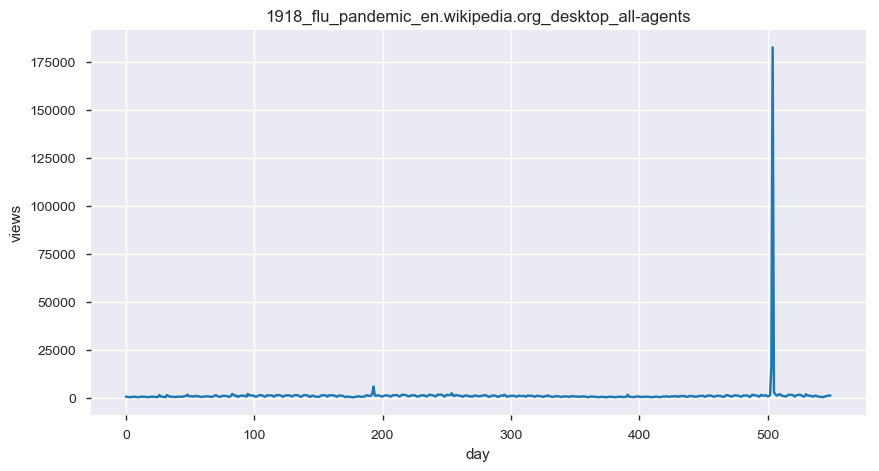

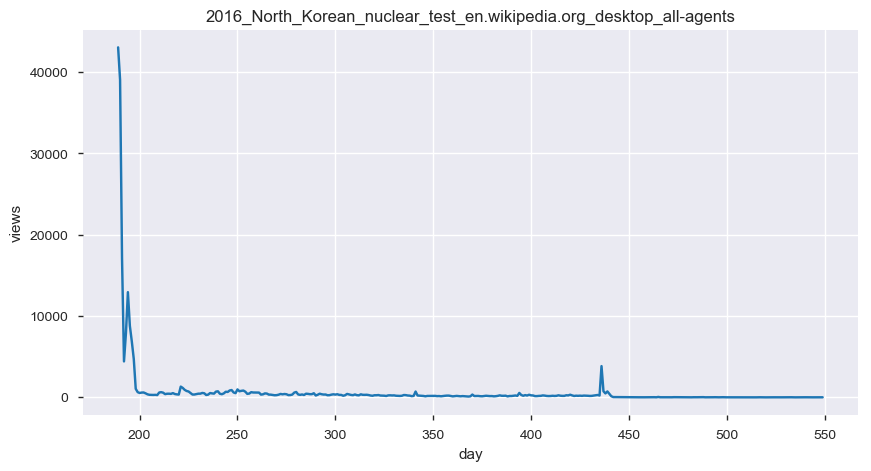

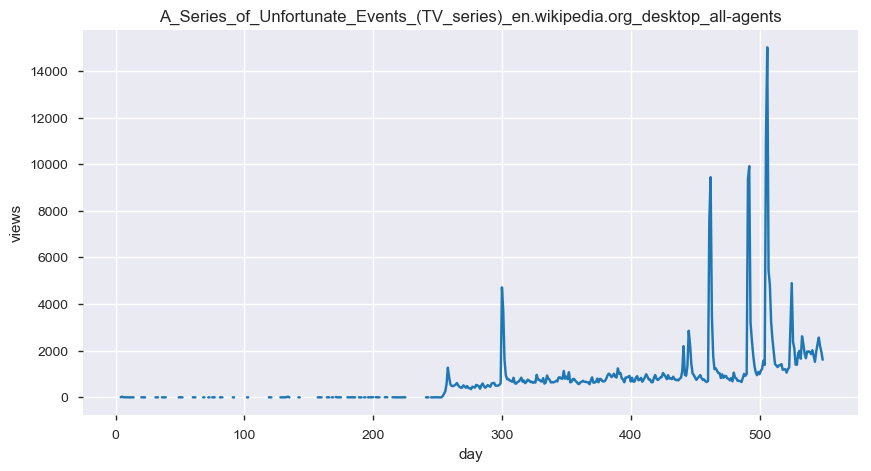

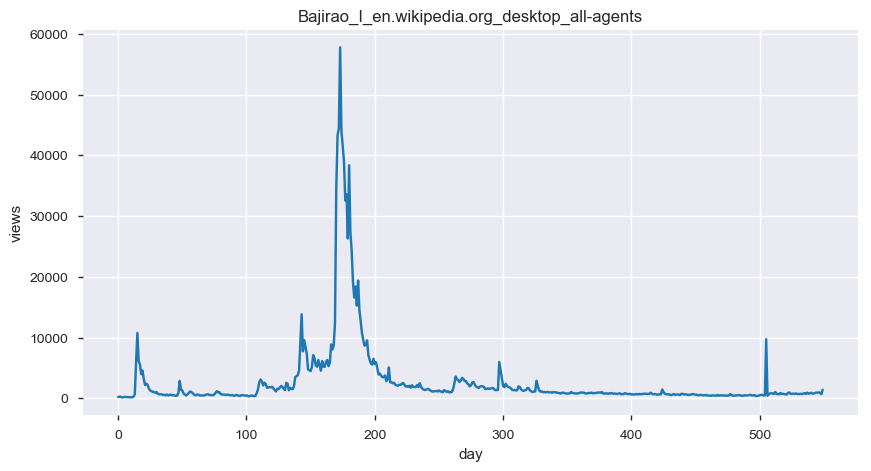

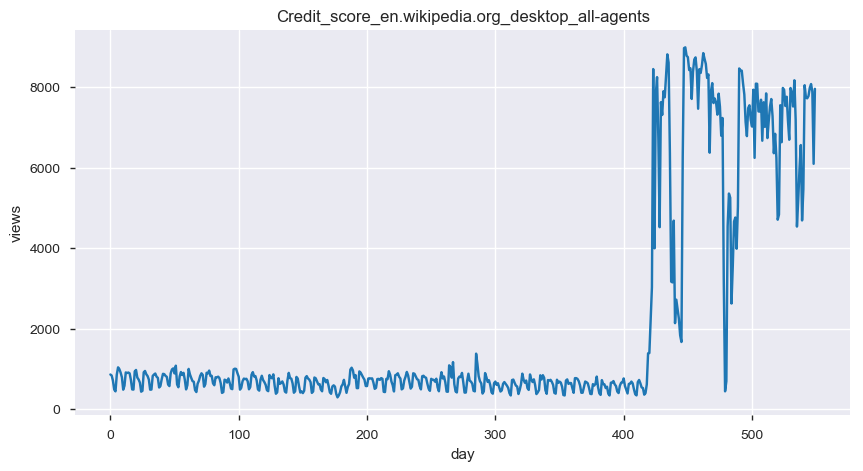

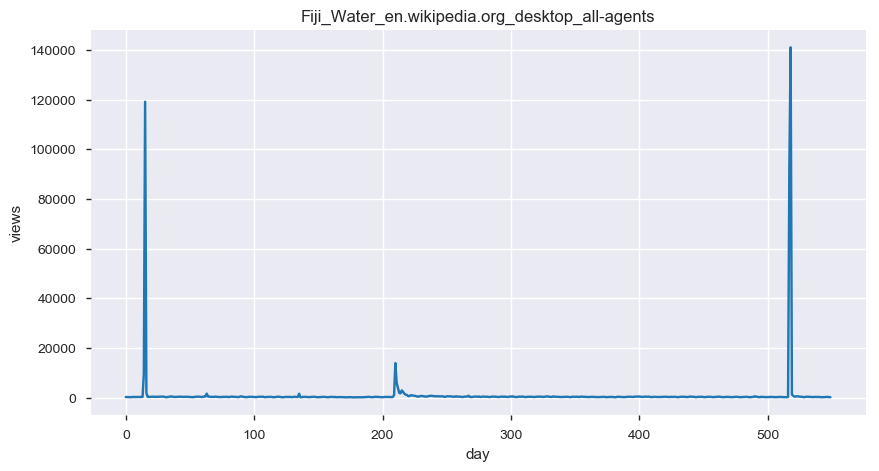

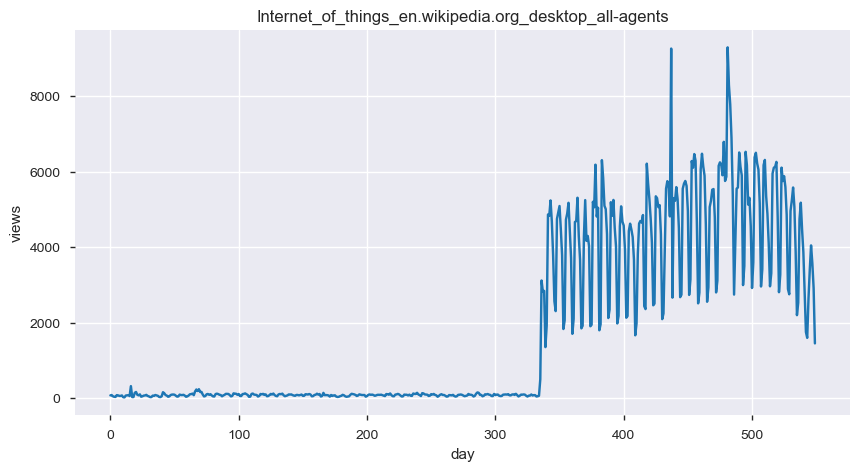

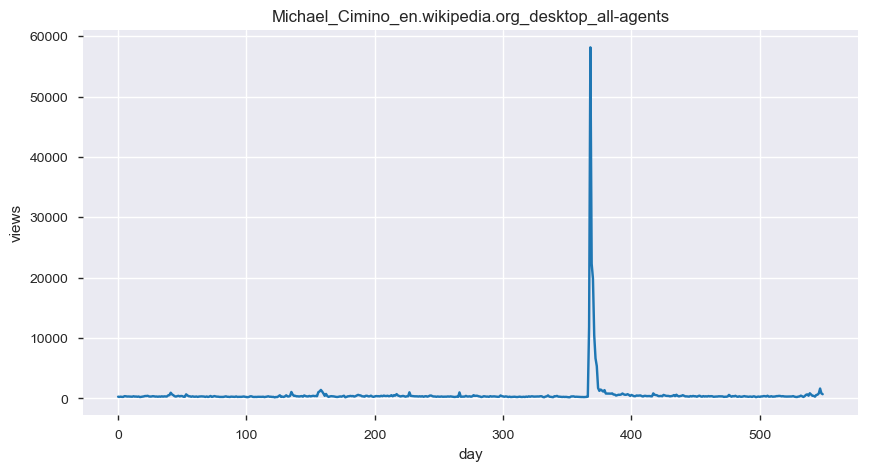

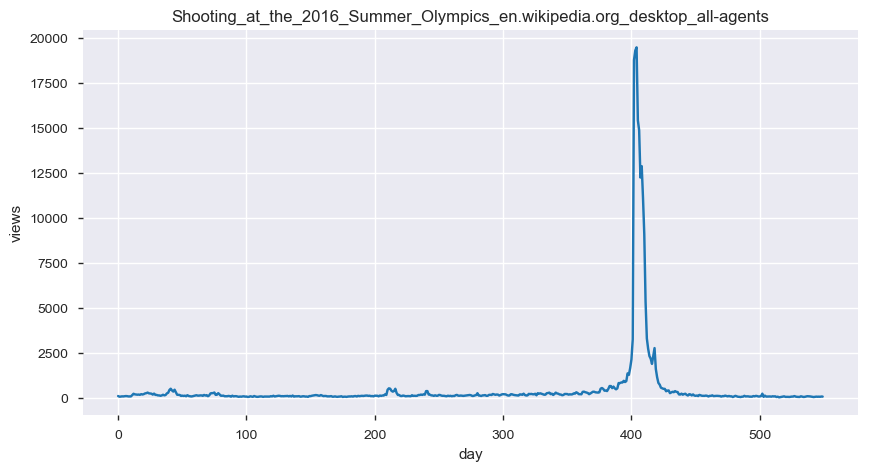

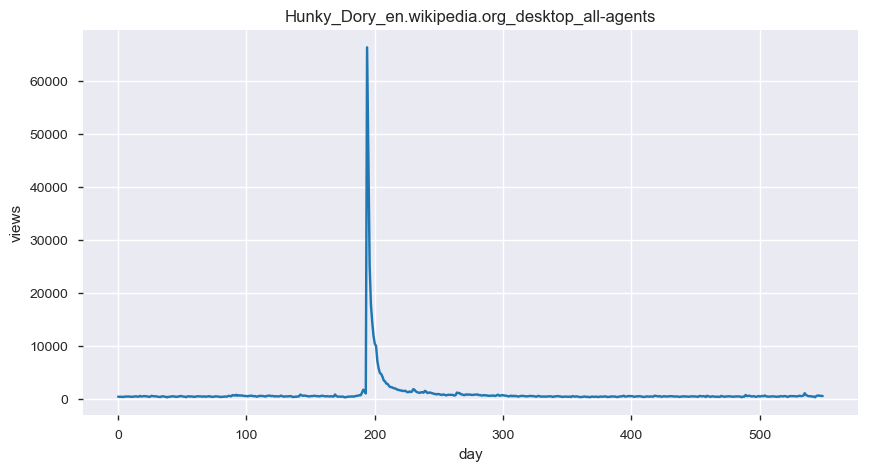

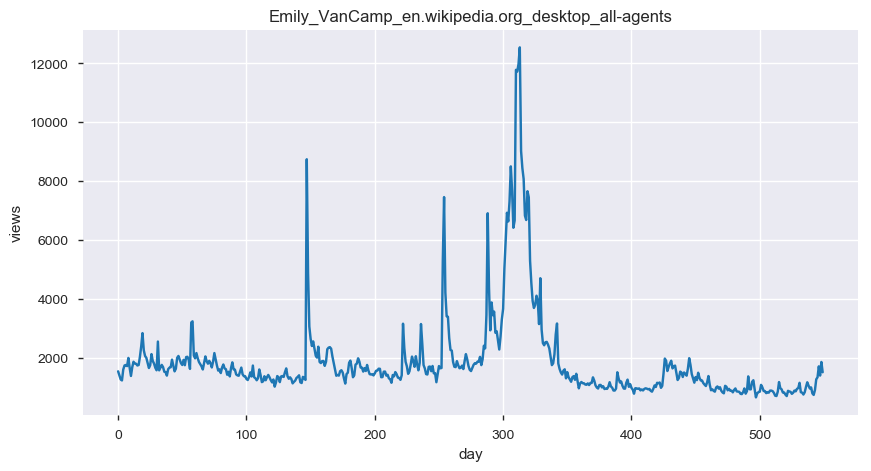

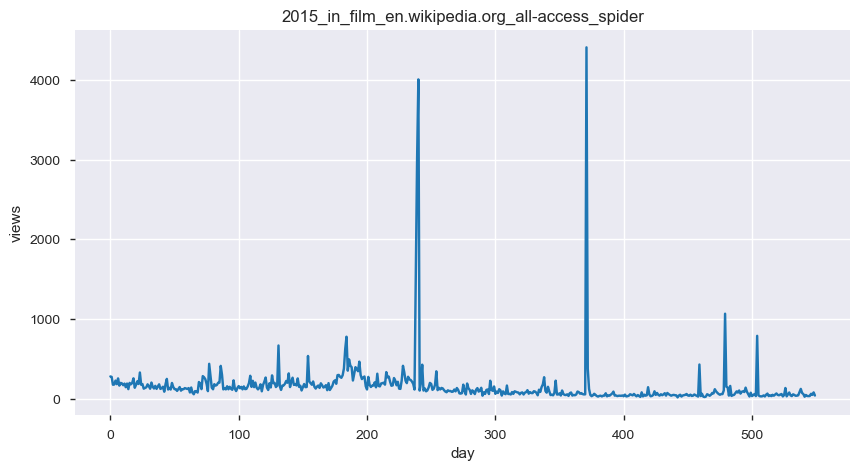

In [32]:
def plot_entry(key,idx):
    data = lang_sets[key].iloc[idx,1:]
    fig = plt.figure(1,figsize=(10,5))
    plt.plot(days,data)
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(df_train.iloc[lang_sets[key].index[idx],0])
    
    plt.show()

idx = [10, 50, 100, 250,500,750,1000,1500,2000,3000,4000,5000]
for i in idx:
    plot_entry('en',i)

# Lets look at the top pages

In [37]:
npages = 5
top_pages = {}
for key in lang_sets:
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    top_pages[key] = sum_set.index[0]

# Making Predictions
The baseline given so far is for guessing 0 views for everything. There are a few other easy benchmarks we can try out:

Average number of views for that page (constant value)
Linear regression
More complicated regression curves
But we've also seen that the data for related topics seems to be correlated and that topics that are in the news get a lot of traffic, so this maybe points to some ways to improve things. Unfortunately, with the different languages, training a model to identify related topics may be quite difficult. However, trying to cluster similar topics using just the data rather than the page name might help us out a bit. We could potentially smooth out some of the unpredictable spikes and could maybe use high-view pages to reduce effects of statistical fluctuations on low-view pages.

I also wonder if something like a recurrent neural net might help out here if we want to try out more complicated methods.

As an example, I look at ARIMA models for a small set of pages.

# ARIMA Models
Statsmodels also includes things like ARMA and ARIMA models that can be used to make predictions from time series. This data is not necessarily very stationary and often has strong periodic effects, so these may not necessarily work very well. I'll look at ARIMA predictions for the same set of very high viewcount pages.

In [35]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

cols = df_train.columns[1:-1]
for key in top_pages:
    data = np.array(train.loc[top_pages[key],cols],'f')
    result = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = ARIMA(data,[2,1,4])
            result = arima.fit(disp=False)
        except:
            try:
                arima = ARIMA(data,[2,1,2])
                result = arima.fit(disp=False)
            except:
                print(train.loc[top_pages[key],'Page'])
                print('\tARIMA failed')
    #print(result.params)
    pred = result.predict(2,599,typ='levels')
    x = [i for i in range(600)]
    i=0

    plt.plot(x[2:len(data)],data[2:] ,label='Data')
    plt.plot(x[2:],pred,label='ARIMA Model')
    plt.title(train.loc[top_pages[key],'Page'])
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()

NameError: name 'top_pages' is not defined